In [31]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
#reading Dataset
#retail = pd.read_csv("Data/Irish Commuting Data by Area.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
retail = pd.read_csv("Data/Irish Commuting Data by Area.csv",  sep = ',', header= 0)

In [33]:
retail.describe()

,Travelling_Time_Number,Persons_at_work_2016_VALUE,Percentage_change_of_persons_at_work_2011_2016,Broad_Industrial_Group_Recoded
count,132.000000,132.000000,132.000000,132.000000
mean,40.166667,13030.325758,17.296970,12.500000
std,29.468360,16921.097412,19.620666,6.368458
min,1.000000,14.000000,-34.900000,2.000000
25%,15.000000,1755.750000,3.250000,7.000000
50%,37.500000,6369.000000,13.650000,12.500000
75%,60.000000,16883.500000,28.875000,18.000000
max,90.000000,84010.000000,86.300000,23.000000


In [34]:
retail

,Broad_Industrial_Group,Travelling_Time,Travelling_Time_Number,Persons_at_work_2016_VALUE,Percentage_change_of_persons_at_work_2011_2016,Broad_Industrial_Group_Recoded
0,"Agriculture, forestry and fishing (A)",< ¼ hour,1,19577,-4.0,2
1,"Agriculture, forestry and fishing (A)",¼ hour - < ½ hour,15,9910,3.3,2
2,"Agriculture, forestry and fishing (A)",½ hour - < ¾ hour,30,5557,2.7,2
3,"Agriculture, forestry and fishing (A)",¾ hour - < 1 hour,45,1307,8.1,2
4,"Agriculture, forestry and fishing (A)",1 hour - < 1½ hours,60,1878,18.9,2
...,...,...,...,...,...,...
127,Industry not stated,¼ hour - < ½ hour,15,19896,28.4,23
128,Industry not stated,½ hour - < ¾ hour,30,16484,36.8,23
129,Industry not stated,¾ hour - < 1 hour,45,4542,42.1,23
130,Industry not stated,1 hour - < 1½ hours,60,6206,61.6,23


In [35]:
RFM = retail [ [ "Broad_Industrial_Group", "Travelling_Time_Number", "Persons_at_work_2016_VALUE", "Percentage_change_of_persons_at_work_2011_2016" ]].copy ()

In [36]:
RFM_norm1 = retail [ [ "Travelling_Time_Number", "Persons_at_work_2016_VALUE", "Percentage_change_of_persons_at_work_2011_2016" ]].copy ()

In [37]:
RFM_norm1

,Travelling_Time_Number,Persons_at_work_2016_VALUE,Percentage_change_of_persons_at_work_2011_2016
0,1,19577,-4.0
1,15,9910,3.3
2,30,5557,2.7
3,45,1307,8.1
4,60,1878,18.9
...,...,...,...
127,15,19896,28.4
128,30,16484,36.8
129,45,4542,42.1
130,60,6206,61.6


In [38]:
#Copy of the data before it's normalised in the next step
RFM_norm2 = RFM_norm1

In [39]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [40]:
RFM_norm1

array([[-1.33417245,  0.38836808, -1.08957064],
       [-0.85727676, -0.18510695, -0.71609658],
       [-0.3463171 , -0.44333978, -0.74679308],
       [ 0.16464256, -0.69546235, -0.4705246 ],
       [ 0.67560222, -0.66158894,  0.08201236],
       [ 1.69752154, -0.7273781 , -0.33239036],
       [-1.33417245, -0.69914038, -1.57048244],
       [-0.85727676, -0.67102129, -1.31979437],
       [-0.3463171 , -0.71551351, -1.02817764],
       [ 0.16464256, -0.75585312, -1.15607972],
       [ 0.67560222, -0.75620906,  0.13317319],
       [ 1.69752154, -0.76487021,  0.25595918],
       [-1.33417245,  2.08417413, -0.77237349],
       [-0.85727676,  3.1203089 , -0.54726584],
       [-0.3463171 ,  1.73897384, -0.17890787],
       [ 0.16464256,  0.09365162,  0.0103872 ],
       [ 0.67560222, -0.02588413,  0.48106683],
       [ 1.69752154, -0.51642567,  0.23549485],
       [-1.33417245, -0.68401302, -0.80306999],
       [-0.85727676, -0.57367232, -0.63935534],
       [-0.3463171 , -0.57705373, -0.250

In [41]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.334172,0.388368,-1.089571
1,-0.857277,-0.185107,-0.716097
2,-0.346317,-0.443340,-0.746793
3,0.164643,-0.695462,-0.470525
4,0.675602,-0.661589,0.082012


# K-Means with some K

In [42]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 3, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=3)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [43]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

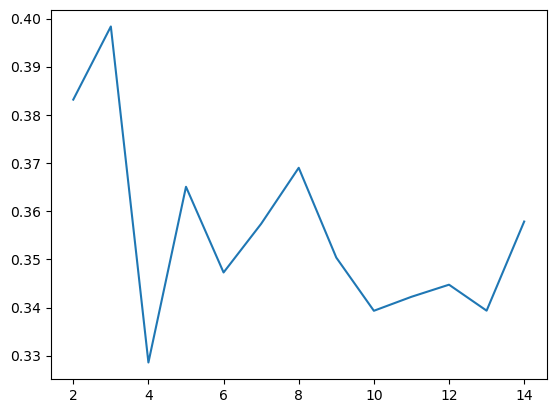

In [44]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

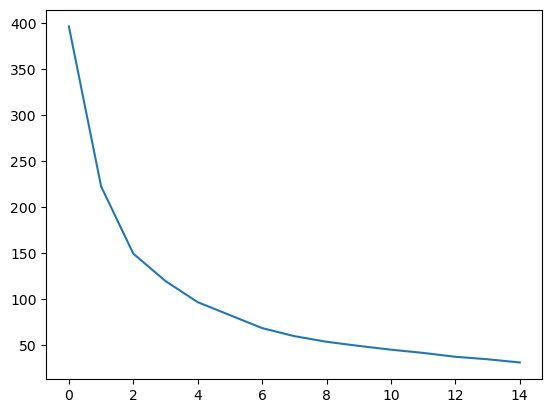

In [45]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,16)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [46]:
# analysis of clusters formed
RFM = RFM_norm2
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['Commute_Duration', 'Sample_Size', 'Sample_Volatility', 'ClusterID']

km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Sample_Size.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Commute_Duration.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Sample_Volatility.mean())

In [47]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Sample_Size", "Commute_Duration", "Sample_Volatility"]
df.head()

,ClusterID,Sample_Size,Commute_Duration,Sample_Volatility
0,0,54409.714286,14.285714,6.292857
1,1,11419.566667,20.783333,5.028333
2,2,4708.500000,66.465517,32.644828


<Axes: xlabel='ClusterID', ylabel='Sample_Size'>

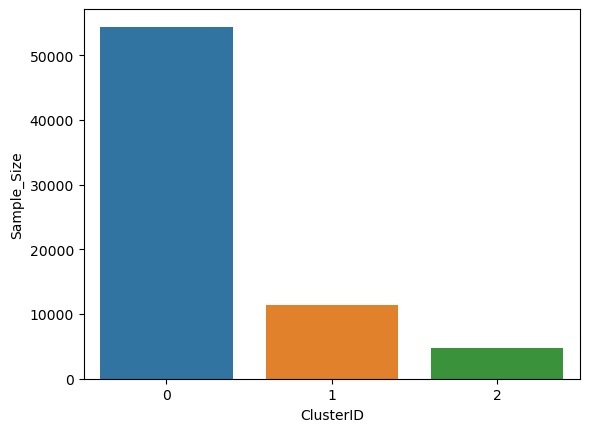

In [48]:
sns.barplot(x=df.ClusterID, y=df.Sample_Size)

<Axes: xlabel='ClusterID', ylabel='Commute_Duration'>

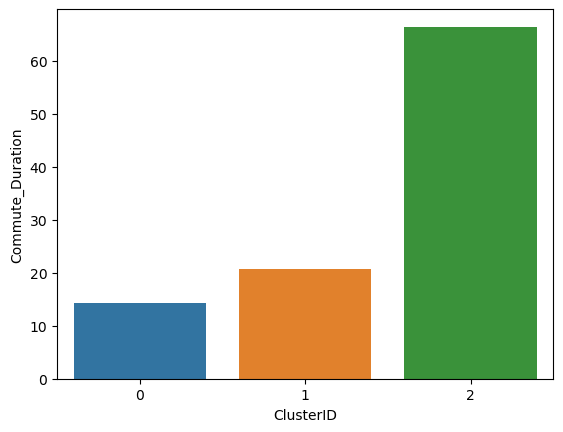

In [49]:
sns.barplot(x=df.ClusterID, y=df.Commute_Duration)

<Axes: xlabel='ClusterID', ylabel='Sample_Volatility'>

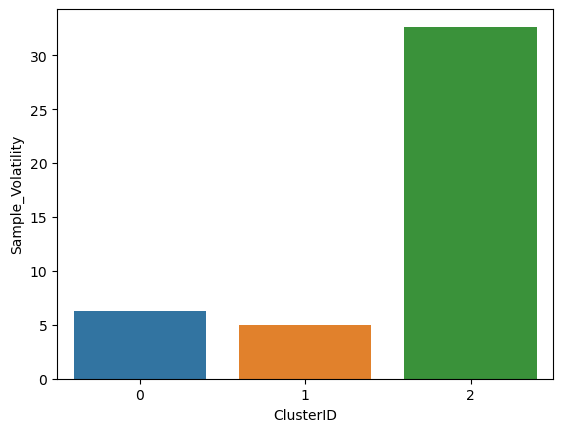

In [50]:
sns.barplot(x=df.ClusterID, y=df.Sample_Volatility)

In [51]:
# Import the necessary modules
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [97]:
# Load the dataset and split it into training and testing sets
#X, y = load_iris(return_X_y=True)
y = retail [ [ "Broad_Industrial_Group_Recoded" ]].copy ()
y = y.to_numpy()
y = y.reshape((-1,))
X = RFM_norm1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [98]:
X.shape

(132, 3)

In [99]:
y.shape

(132,)

In [100]:
# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10], 'max_iter' : [1000]}

In [101]:
# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(), param_grid)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79, 3), (53, 3), (79,), (53,))

In [73]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]})

In [74]:
# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
Best score: 0.24761904761904763


In [75]:
# Predict on the test data using the best estimator
y_pred = grid.predict(X_test)

In [76]:
# Print the accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.18518518518518517


In [81]:
#Different estimators are better suited for different types of data and different problems. 
#We can see in the above from the SVC angle the linear model is the reccomended crtieria from Grid Search CV, 
#but has a low accuracy score. SVC isn't looking good.

In [82]:
# Import modules
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [83]:
# Define parameter grid for KMeans
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300]
}

In [84]:
# Create pipeline with scaling and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

In [87]:
# Initialize GridSearchCV with pipeline, parameter grid, and scoring function
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [91]:
# Fit GridSearchCV on data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__max_iter': [100, 200, 300],
                         'kmeans__n_clusters': [2, 3, 4, 5]})

In [103]:
# Get best parameters and best estimator
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

{'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 5}
Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(max_iter=100, n_clusters=5))])
Best score: -18.180126368978968


In [104]:
# Predict on the test data using the best estimator
# Predict on the test data using the best estimator
y_pred = grid_search.predict(X_test)

In [105]:
# Print the accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.018867924528301886


In [106]:
#The kmeans++ model was proffered by GridSearch CV, but let's look at doing this step by step given the small dataset 
#and that that technically we don't expect huge patterns or trends to be observed in the data, 
#but let's see what the modelling can provide us with-Perhaps some new insight we couldn't have seen otherwise without 
#large computing power.